# Switch between hemispheres

Many functions within PolarToolkit require knowing whether its working with data in the EPSG 3031 project for Antarctica or the EPSG 3413 projection for the Arctic(including Greenland). These function each have a parameter `hemisphere` which can be set to either 'south' or 'north' for EPSG 3031 or EPSG 3413, respectively, or a parameter `epsg` which can be set to '3031', '3413', or any other EPSG code. However, for convenience, there are two other methods than manually setting the `hemisphere` or `epsg` variables, as well show here, so you don't need to pass either of these parameters to all the functions. 

In [1]:
%load_ext autoreload
%autoreload 2

import polartoolkit as ptk

## Manually set the `hemisphere` or `epsg` variables 
For any function which requires knowing it's projection (such as plotting a coastline, inset map, scalebar etc.), you can manually set the projection with either the `hemisphere` or `epsg` variables. For example, ice velocity data is available for both Greenland and Antarctica, so you can pass either `hemisphere` or `epsg` to pick which version of the grid is returned in the `ice_vel()` function.

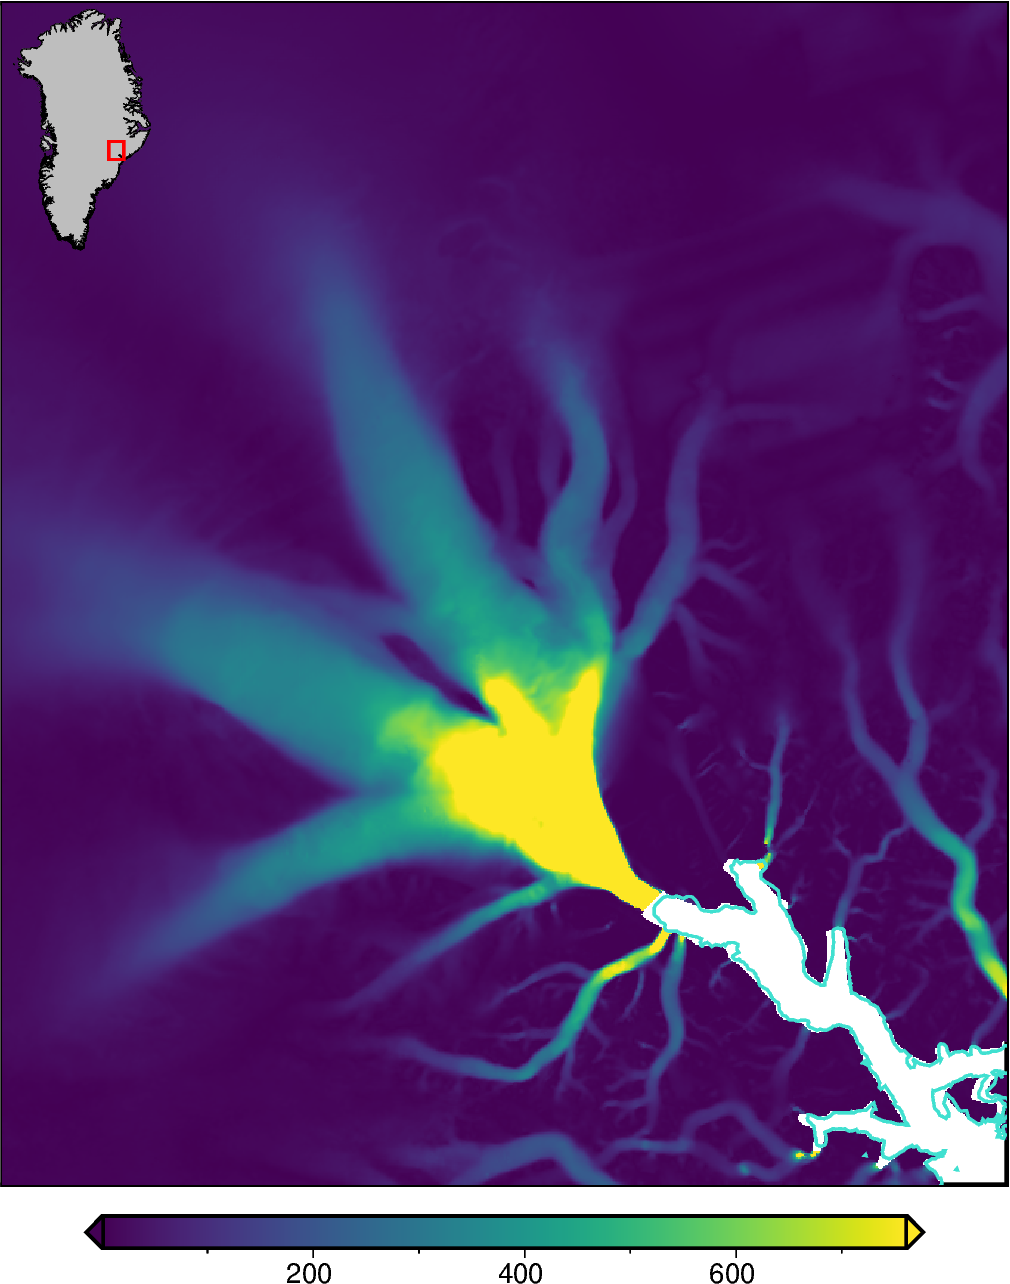

In [2]:
grid = ptk.fetch.ice_vel(
    hemisphere="north",
    # or
    # epsg="3413",
)

fig = ptk.plot_grid(
    grid,
    hemisphere="north",
    # or
    # epsg="3413",
    region=ptk.regions.kangerlussuaq_glacier,
    robust=True,
    inset=True,
    coast=True,
    coast_pen="1p,turquoise",
)
fig.show(dpi=200)

## Temporarily set for Python session
If you know everything in your notebook or python file will be related to just one of the hemisphere, you can set a temporary environment variable for your current python session. This can be overwritten by the above manual setting of either `hemisphere` or `epsg`. You can either use "POLARTOOLKIT_HEMISPHERE" set to "north" or "south", or set the EPSG code directly with "POLARTOOLKIT_EPSG".

Note that when we rerun the above function we will now download ice velocity data and make a plot for Antarctica, instead of Greenland.

In [3]:
import os

os.environ["POLARTOOLKIT_HEMISPHERE"] = "south"
# or set the EPSG code directly
# os.environ["POLARTOOLKIT_EPSG"] = "3031"

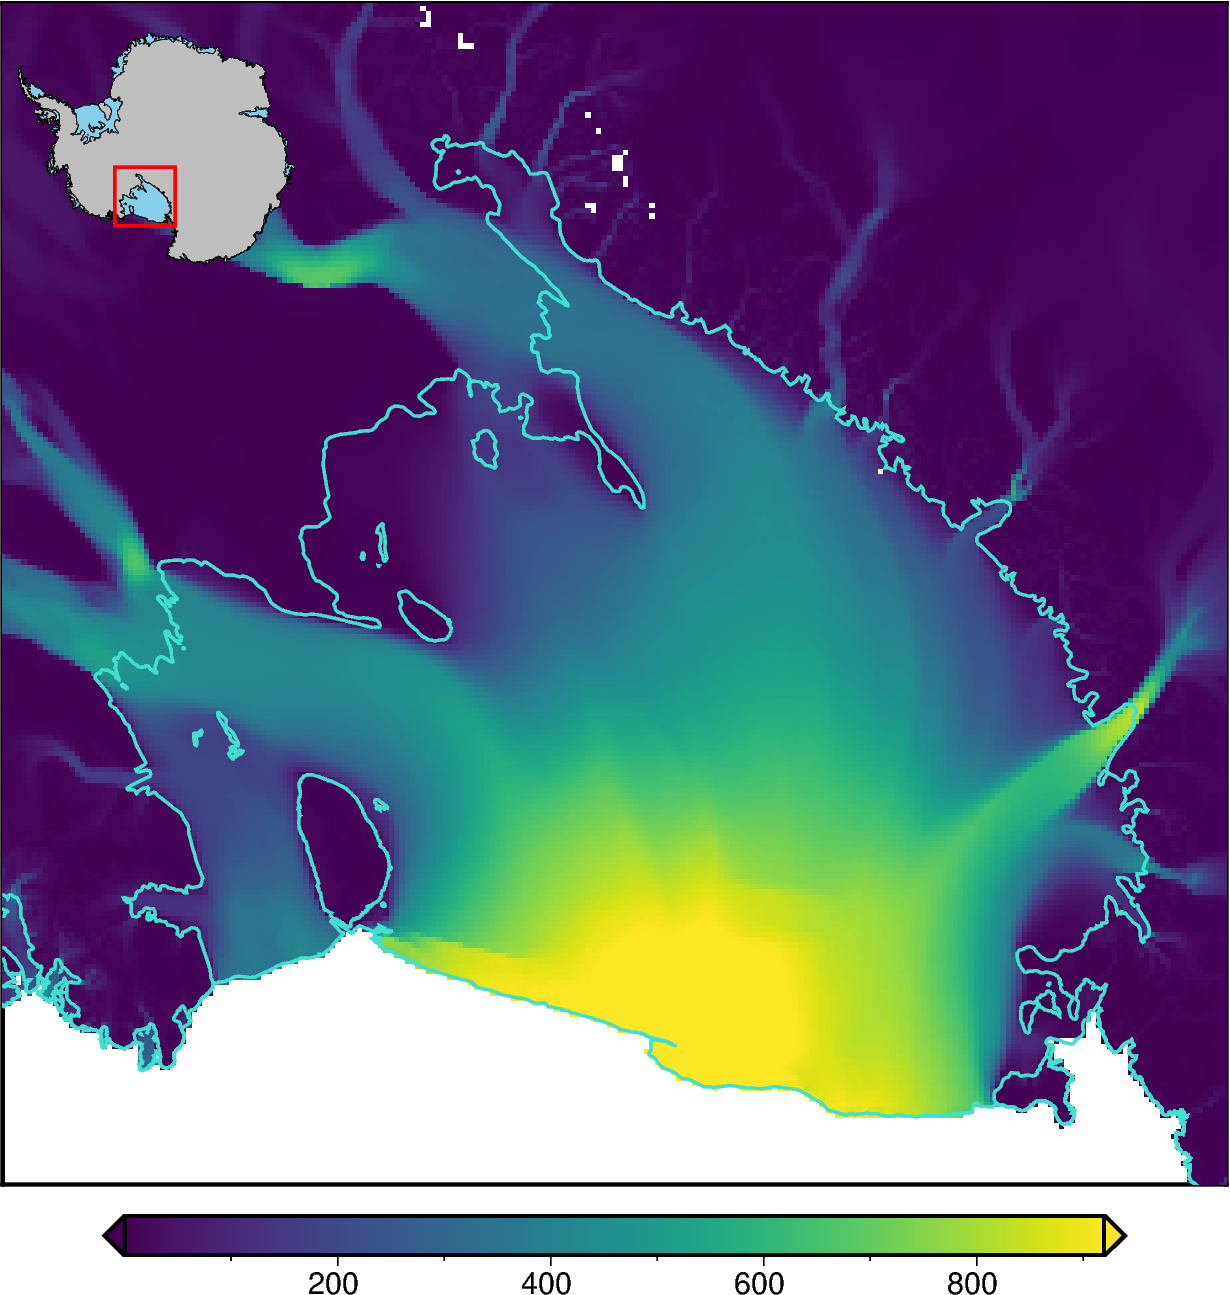

In [4]:
grid = ptk.fetch.ice_vel()

fig = ptk.plot_grid(
    grid,
    region=ptk.regions.ross_ice_shelf,
    robust=True,
    inset=True,
    coast=True,
    coast_pen="1p,turquoise",
)
fig.show(dpi=200)

## Permanently set
If you know you will be using PolarToolkit almost entirely for just one hemisphere / EPSG projection, it makes sense to use an environment variable in your operating system to set the value of hemisphere. If you need to temporarily switch to the other hemisphere, either of the above two options can be used to overwrite the environment variable temporarily. 

The name you need to give the environment variable is either "POLARTOOLKIT_HEMISPHERE" with a value of either "north" or "south", or "POLARTOOLKIT_EPSG" with an EPSG code in the format "3031". This is done different on each operating system. 

For Unix or Mac OS, add the following to the end of your `.bashrc` file (Unix) or `.bash_profile` (Mac OS):
```
export POLARTOOLKIT_HEMISPHERE=north
```
or 
```
export POLARTOOLKIT_EPSG=3413
```

You may need to restart your computer for this to take effect. 

For Windows, follow the below instructions:

* Launch "Control Panel"
* Go to "System" -> "Advanced system settings" -> "Advanced" tab -> "Environment variables" -> "System Variables" (for all users)
* Choose "New"
* Enter the variable "Name" as:
    * POLARTOOLKIT_HEMISPHERE and "Value" either north or south, or the EPSG code
    * POLARTOOLKIT_EPSG and "Value" as the EPSG code (i.e. 3413)
